In [183]:
import simpy
import random
import matplotlib.pyplot as pp
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit
%matplotlib inline

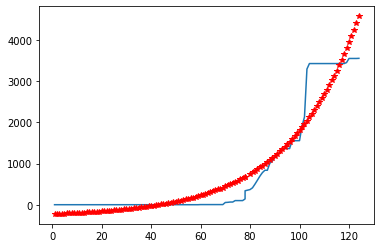

In [260]:
df = pd.read_csv('Covid-EC.csv', sep=',')

x = np.array(list(df.iloc[:, 0])) #dias
y = np.array(list(df.iloc[:, 6])) #recuperados

def reg_exponencial(x, c0, c1, c2, c3):
    return c0 * np.exp(-c1 * x) + c2 + c3

g = [100, 0.01, 200, 0.01]
pre = np.empty(len(y))
for i in range(len(y)):
    pre[i] = reg_exponencial(x[i], g[0], g[1], g[2], g[3])
    
popt, pcov = curve_fit(reg_exponencial, x, y, g)
for i in range(len(y)):
    pre[i] = reg_exponencial(x[i], popt[0], popt[1], popt[2], popt[3])
pp.plot(x, y)
pp.plot(x, pre, 'r*')

Prediccion 7 dias  5726 recuperados


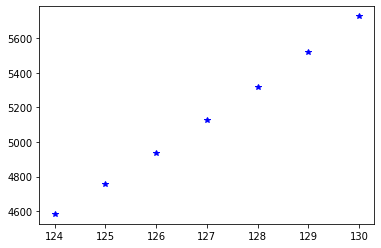

In [277]:
predi7 = np.array([i for i in range(len(x), len(x)+7)], dtype = float)
pp.plot(predi7, reg_exponencial(predi7, *popt), 'b*')
print('Prediccion 7 dias ', (int(reg_exponencial(predi7, *popt)[-1])), 'recuperados')

Prediccion 30 dias  13675 recuperados


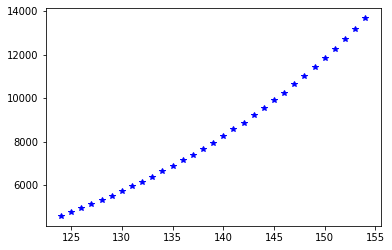

In [278]:
predi30 = np.array([i for i in range(len(x), len(x)+31)], dtype = float)
pp.plot(predi30, reg_exponencial(predi30, *popt), 'b*')
print('Prediccion 30 dias ', (int(reg_exponencial(predi30, *popt)[-1])), 'recuperados')

In [280]:
media = y.mean()

835.5483870967741

In [176]:
personas_teletrabajo = []
personas_presencial = []
personas_despedidas = []

In [175]:
class Persona:
    nombre = ''
    estado_trabajo = True
    tipo_trabajo = ''
    forma_trabajo = ''
    test = False
    
    def __init__(self, nombre, estado_trabajo, tipo_trabajo, forma_trabajo, test):
        self.nombre = nombre
        self.estado_trabajo = estado_trabajo
        self.tipo_trabajo = tipo_trabajo
        self.forma_trabajo = forma_trabajo
        self.test = test

In [177]:
class Simulacion:
    def __init__(self, env, estacion):
        self.env = env
        self.estacion = simpy.Resource(env, estacion)
    
    def notificacion_depidos(self, persona):
        posibilidad = random.randint(1, 7)
        if posibilidad > 7:
            persona.estado_trabajo = False
            print('Se ha notificado que a la persona ', persona.nombre, ' ha sido DESPEDIDA de su cargo')
            personas_despedidas.append(persona)
        else:
            print('Se ha notificado que a la persona ', persona.nombre, ' aun CONSERVA su cargo')
        yield self.env.timeout(1)
    
    def descanso_previo(self, persona):
        tiempo = random.randint(1, 7)
        yield self.env.timeout(tiempo)
        print('La persona', persona.nombre, ' descanso: ', tiempo, ' dias')
    def teletrabajo(self, persona):
        self.realizar_test(persona)
        if  persona.test == False:
            tiempo = random.randint(4, 15)
            yield self.env.timeout(tiempo)
            print('La persona', persona.nombre, ' empezo con el teletrabajo al dia: ',tiempo)
        else:
            tiempo = random.randint(4, 15)
            yield self.env.timeout(tiempo)
            print('La persona', persona.nombre, ' no paso el test de COVID CONTINUA con teletrabajo ',tiempo, 'dias mas')
    
    def realizar_test(self, persona):
        posibilidad = random.randint(0, 10) + 1
        if posibilidad < 8:
            persona.test = True
            personas_presencial.append(persona)
            print('La persona', persona.nombre, ' Retoma su trabajo normal en  el area de ', persona.tipo_trabajo)
        else:
            persona.test = False
            personas_teletrabajo.append(persona)
        


In [178]:
def simular(env, persona, simulacion):
    with simulacion.estacion.request() as estacion:
        yield estacion
        print('Notificacion estado de trabajo')
        yield env.process(simulacion.notificacion_depidos(persona))
        
    if persona.estado_trabajo:
        yield env.process(simulacion.descanso_previo(persona))
        yield env.process(simulacion.teletrabajo(persona))

In [182]:
def ejecutar_simulacion(env, estacion):
    simulacion = Simulacion(env, estacion)
    for persona in personas:
        yield env.timeout(1)
        env.process(simular(env, persona, simulacion))
env = simpy.Environment()
env.process(ejecutar_simulacion(env, 100))
env.run(until = 365)

Notificacion estado de trabajo
Se ha notificado que a la persona  persona(0)  aun CONSERVA su cargo
Notificacion estado de trabajo
Se ha notificado que a la persona  persona(1)  aun CONSERVA su cargo
Notificacion estado de trabajo
Se ha notificado que a la persona  persona(2)  aun CONSERVA su cargo
Notificacion estado de trabajo
Se ha notificado que a la persona  persona(3)  aun CONSERVA su cargo
Notificacion estado de trabajo
Se ha notificado que a la persona  persona(4)  aun CONSERVA su cargo
La persona persona(0)  descanso:  4  dias
La persona persona(3)  descanso:  1  dias
Notificacion estado de trabajo
Se ha notificado que a la persona  persona(5)  aun CONSERVA su cargo
La persona persona(2)  descanso:  3  dias
Notificacion estado de trabajo
Se ha notificado que a la persona  persona(6)  aun CONSERVA su cargo
Notificacion estado de trabajo
Se ha notificado que a la persona  persona(7)  aun CONSERVA su cargo
La persona persona(1)  descanso:  6  dias
La persona persona(1)  Retoma su

In [181]:
total_personas = 100
personas = []
#generar personas
for i in range(0, total_personas):
    persona = Persona('persona(%d)'%i, True, actividad(), 'teletrabajo', False)
    personas.append(persona)
    persona = None

In [173]:
def actividad():
    a = random.randint(0, 4)
    print(a)
    if a == 0:
        return 'alimentacion'
    if a == 1:
        return 'retail'
    if a == 2:
        return 'restaurante'
    if a == 3:
        return 'viajes'
    if a == 4:
        return 'hoteles'

In [180]:
actividad()

'viajes'